<a href="https://colab.research.google.com/github/cartejaune/Liens-divers/blob/main/Aligator_Bis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install python-binance
! pip install ta
! pip install requests

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 288 kB 9.4 MB/s 
     |████████████████████████████████| 1.1 MB 49.6 MB/s 
     |████████████████████████████████| 103 kB 61.0 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 271 kB 57.2 MB/s 
     |████████████████████████████████| 144 kB 58.9 MB/s 
     |████████████████████████████████| 94 kB 2.0 MB/s 
  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=b16e1b9587b75676c191570831b380dbf910644e106554b65a1f5d97b04e612b
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta


<h1>Load yours data</h1>

In [ ]:
# -- Import --
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time
from math import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import statistics
import requests


# -- Define Binance Client --
client = Client()

# -- You can change the crypto pair ,the start date and the time interval below --
pairName = "ADAUSDT"
startDate = "01 01 2021"
timeInterval = Client.KLINE_INTERVAL_1HOUR
#timeInterval = Client.KLINE_INTERVAL_1DAY

# -- Load all price data from binance API --
klinesT = client.get_historical_klines(pairName, timeInterval, startDate)

# -- Define your dataset --
df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])

# -- Set the date to index --
df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']
del df['close_time']
del df['quote_av']
del df['trades']


# -- Fear and Greed --
# -- https://api.alternative.me/fng/?limit=0&format=json --
response = requests.get("https://api.alternative.me/fng/?limit=0&format=json")
dataResponse = response.json()['data']
fear = pd.DataFrame(dataResponse, columns = ['timestamp', 'value'])

fear = fear.set_index(fear['timestamp'])
fear.index = pd.to_datetime(fear.index, unit='s')
del fear['timestamp']

df['fearResult'] = fear['value']
df['FEAR'] = df['fearResult'].ffill()
df['FEAR'] = df.FEAR.astype(float)
print(df)

#taconditiondelamortkitue and (row['FEAR'] <= 10 or row['FEAR'] >= 55):

print("Data loaded 100%")
cst = 0
# -- Uncomment the line below if you want to check your price dataset --
# df

                        open     high      low  ...  ignore fearResult  FEAR
timestamp                                       ...                         
2021-01-01 00:00:00  0.18134  0.18146  0.17831  ...       0         94  94.0
2021-01-01 01:00:00  0.18055  0.18469  0.18000  ...       0        NaN  94.0
2021-01-01 02:00:00  0.18361  0.18473  0.18229  ...       0        NaN  94.0
2021-01-01 03:00:00  0.18375  0.18458  0.18259  ...       0        NaN  94.0
2021-01-01 04:00:00  0.18299  0.18367  0.18105  ...       0        NaN  94.0
...                      ...      ...      ...  ...     ...        ...   ...
2022-01-28 08:00:00  1.03400  1.03800  1.02100  ...       0        NaN  24.0
2022-01-28 09:00:00  1.03200  1.03500  1.01700  ...       0        NaN  24.0
2022-01-28 10:00:00  1.02300  1.02500  1.00800  ...       0        NaN  24.0
2022-01-28 11:00:00  1.02300  1.02600  1.01000  ...       0        NaN  24.0
2022-01-28 12:00:00  1.01900  1.02200  1.01700  ...       0        NaN  24.0

<h1>Define your indicators</h1>

In [ ]:
cst=0
# -- Drop all columns we do not need --

df.drop(df.columns.difference(['open','high','low','close','volume','FEAR']), 1, inplace=True)


#// RSI+MFI Parameters  (MONEYFLOW)
rsiMFIperiod = 60 # 'MFI Period'
rsiMFIMultiplier = 150 # 'MFI Area multiplier'
rsiMFIPosY = 2.5 # 'MFI Area Y Pos' 2.5

#db
high = df['high']
low = df['low']
close = df['close']
open = df['open']

rsimfi = (close - open) / (high - low) 
rsimfisma = (ta.trend.sma_indicator(rsimfi, rsiMFIperiod) * rsiMFIMultiplier ) - rsiMFIPosY 
df['moneyflow'] = rsimfisma



# -- Indicators, you can edit every value --
# -- Indicator variable --
stochWindow = 14
willWindow = 14


df['EMA1'] = ta.trend.ema_indicator(close=df['close'], window=7)
df['EMA2'] = ta.trend.ema_indicator(close=df['close'], window=30)
df['EMA3'] = ta.trend.ema_indicator(close=df['close'], window=50)
df['EMA4'] = ta.trend.ema_indicator(close=df['close'], window=100)
df['EMA5'] = ta.trend.ema_indicator(close=df['close'], window=121)
df['EMA6'] = ta.trend.ema_indicator(close=df['close'], window=200)
df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=stochWindow, smooth1=3,smooth2=3)
df['WillR'] = ta.momentum.williams_r(high=df['high'], low=df['low'],close=df['close'], lbp=willWindow)





df

,open,high,low,close,volume,FEAR,moneyflow,EMA1,EMA2,EMA3,EMA4,EMA5,EMA6,STOCH_RSI,WillR
timestamp,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0.18134,0.18146,0.17831,0.18051,19194919.10000000,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,0.18055,0.18469,0.18000,0.18358,28601648.40000000,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,0.18361,0.18473,0.18229,0.18368,20075571.10000000,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 03:00:00,0.18375,0.18458,0.18259,0.18292,15704497.10000000,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 04:00:00,0.18299,0.18367,0.18105,0.18180,16338316.20000000,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28 08:00:00,1.03400,1.03800,1.02100,1.03200,6312815.70000000,24.0,4.368657,1.036849,1.042578,1.046329,1.062493,1.072995,1.114047,0.608304,-50.000000
2022-01-28 09:00:00,1.03200,1.03500,1.01700,1.02400,6058493.70000000,24.0,4.882546,1.033636,1.041379,1.045454,1.061731,1.072192,1.113151,0.402922,-64.814815
2022-01-28 10:00:00,1.02300,1.02500,1.00800,1.02300,9778086.00000000,24.0,3.064364,1.030977,1.040194,1.044573,1.060964,1.071385,1.112254,0.000000,-67.924528


<h1>RUN the Spot Backtest</h1>

Period : [2021-01-01 00:00:00] -> [2022-01-28 12:00:00]
Pair Symbol : ADAUSDT
Starting balance : 1000 $
Final balance : 3623.47 $
Performance vs US Dollar : 262.35 %
Buy and Hold Performence : 465.62 %
Performance vs Buy and Hold : -43.66 %
Number of negative trades :  6
Number of positive trades :  10
Average Positive Trades :  18.97 %
Average Negative Trades :  -3.82 %
Best trade +95.41 %, the  2021-02-14 17:00:00
Worst trade -7.49 %, the  2021-03-20 21:00:00
Worst drawBack -11.0 %
Total fee :  58.86 $
Buy Market number : 16
Sell Market number : 16
PLOT


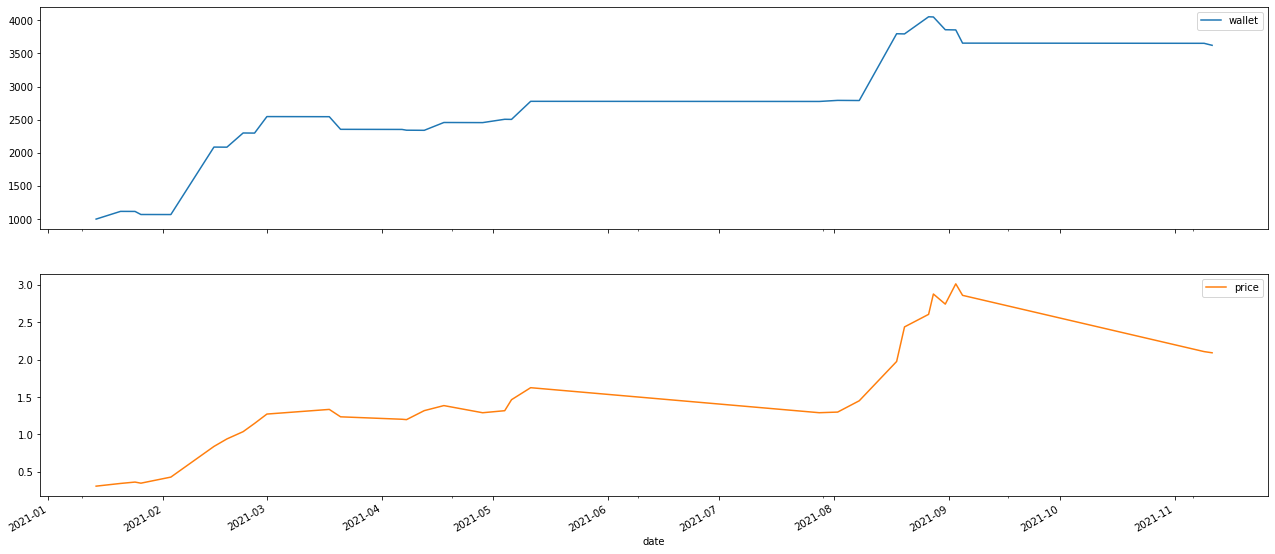

In [ ]:
from numpy.ma.core import allclose

dfTest = df.copy()
#dfTest = df['2021-08-1':]
dt = None
dt = pd.DataFrame(columns = ['date','position', 'reason', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

usdt = 1000
initalWallet = usdt
coin = 0
wallet = 1000
lastAth = 0
previousRow = dfTest.iloc[0]
makerFee = 0.0002
takerFee = 0.0007
stopLoss = 0
takeProfit = 500000
buyReady = True
sellReady = True
# -- Hyper parameters --
maxOpenPosition = 3
stochOverBought = 0.8
stochOverSold = 0.2
willOverSold = -85
willOverBought = -10
TpPct = 0.15

# -- Condition to BUY market --
def buyCondition(row, previousRow):
  if row['EMA1'] > row['EMA2'] and row['EMA2'] > row['EMA3'] and row['EMA3'] > row['EMA4'] and row['EMA4'] > row['EMA5'] and row['EMA5'] > row['EMA6'] and (row['FEAR'] >= 50) and row['moneyflow']>8 :
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row, previousRow):
  if row['EMA5'] > row['EMA1'] and (row['STOCH_RSI'] > 0.2 or row['WillR'] > willOverBought) or (row['FEAR'] < 50) :
    return True
  else:
    return False

for index, row in dfTest.iterrows():
  #Buy market order
  if buyCondition(row, previousRow) == True and usdt > 0 and buyReady == True:
    #You can define here at what price you buy
    buyPrice = row['close']

    #Define the price of you SL and TP or comment it if you don't want a SL or TP
    #stopLoss = buyPrice - 0.03 * buyPrice
    #stopLoss = row['low-1']
    #takeProfit = buyPrice + 0.2 * buyPrice

    coin = usdt / buyPrice
    fee = takerFee * coin
    coin = coin - fee
    usdt = 0
    wallet = coin * row['close']
    if wallet > lastAth:
      lastAth = wallet

    # print("Buy COIN at",buyPrice,'$ the', index)
    myrow = {'date': index,'position': "Buy", 'reason': 'Buy Market','price': buyPrice,'frais': fee*row['close'],'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  #Stop Loss
  elif row['low'] < stopLoss and coin > 0:

    sellPrice = stopLoss

    usdt = coin * sellPrice
    fee = makerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = False
    wallet = usdt
    if wallet > lastAth:
      lastAth = wallet
    # print("Sell COIN at Stop Loss",sellPrice,'$ the', index)
    myrow = {'date': index,'position': "Sell", 'reason': 'Sell Stop Loss', 'price': sellPrice, 'frais': fee, 'fiat': usdt, 'coins': coin, 'wallet': wallet, 'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)

  #Take Profit
  elif row['high'] > takeProfit and coin > 0:

    sellPrice = takeProfit

    usdt = coin * sellPrice
    fee = makerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = False
    wallet = usdt
    if wallet > lastAth:
      lastAth = wallet
    # print("Sell COIN at Take Profit Loss",sellPrice,'$ the', index)
    myrow = {'date': index,'position': "Sell", 'reason': 'Sell Take Profit', 'price': sellPrice, 'frais': fee, 'fiat': usdt, 'coins': coin, 'wallet': wallet, 'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)     

  # Sell Market
  elif sellCondition(row, previousRow) == True:
    buyReady = True
    if coin > 0 and sellReady == True:
      sellPrice = row['close']
      usdt = coin * sellPrice
      frais = takerFee * usdt
      usdt = usdt - frais
      coin = 0
      wallet = usdt
      if wallet > lastAth:
        lastAth = wallet
      # print("Sell COIN at",sellPrice,'$ the', index)
      myrow = {'date': index,'position': "Sell", 'reason': 'Sell Market', 'price': sellPrice, 'frais': frais, 'fiat': usdt, 'coins': coin, 'wallet': wallet, 'drawBack':(wallet-lastAth)/lastAth}
      dt = dt.append(myrow,ignore_index=True)
  
  previousRow = row

#///////////////////////////////////////
print("Period : [" + str(dfTest.index[0]) + "] -> [" +str(dfTest.index[len(dfTest)-1]) + "]")
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100

print("Pair Symbol :",pairName)
print("Starting balance : 1000 $")
print("Final balance :",round(wallet,2),"$")
print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%")
idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
print("Worst drawBack", str(100*round(dt['drawBack'].min(),2)),"%")
print("Total fee : ",round(dt['frais'].sum(),2),"$")
reasons = dt['reason'].unique()
for r in reasons:
  print(r+" number :",dt.groupby('reason')['date'].nunique()[r])
del dt['date']
dt[['wallet','price']].plot(subplots=True, figsize=(22,10))
print('PLOT')
#dt